In [50]:
import pandas as pd
import numpy as np

In [51]:
connectivity = pd.read_csv('metrics_df.csv')
link = pd.read_csv('boardex_crsp_comp_link.csv')
crsp = pd.read_csv('crsp.csv')

In [52]:
connectivity.columns

Index(['company_linking', 'year', 'betweenness', 'closeness', 'degree',
       'eigenvector'],
      dtype='object')

Summary Statistics:
       betweenness  closeness     degree  eigenvector
count   405,341.00 405,341.00 405,341.00   405,341.00
mean     28,351.67       0.24       0.00         0.00
std     114,522.47       0.20       0.00         0.05
min           0.00       0.06       0.00         0.00
25%           0.00       0.17       0.00         0.00
50%         111.97       0.19       0.00         0.00
75%      17,590.00       0.21       0.00         0.00
max   9,592,186.22       1.00       1.00         1.00


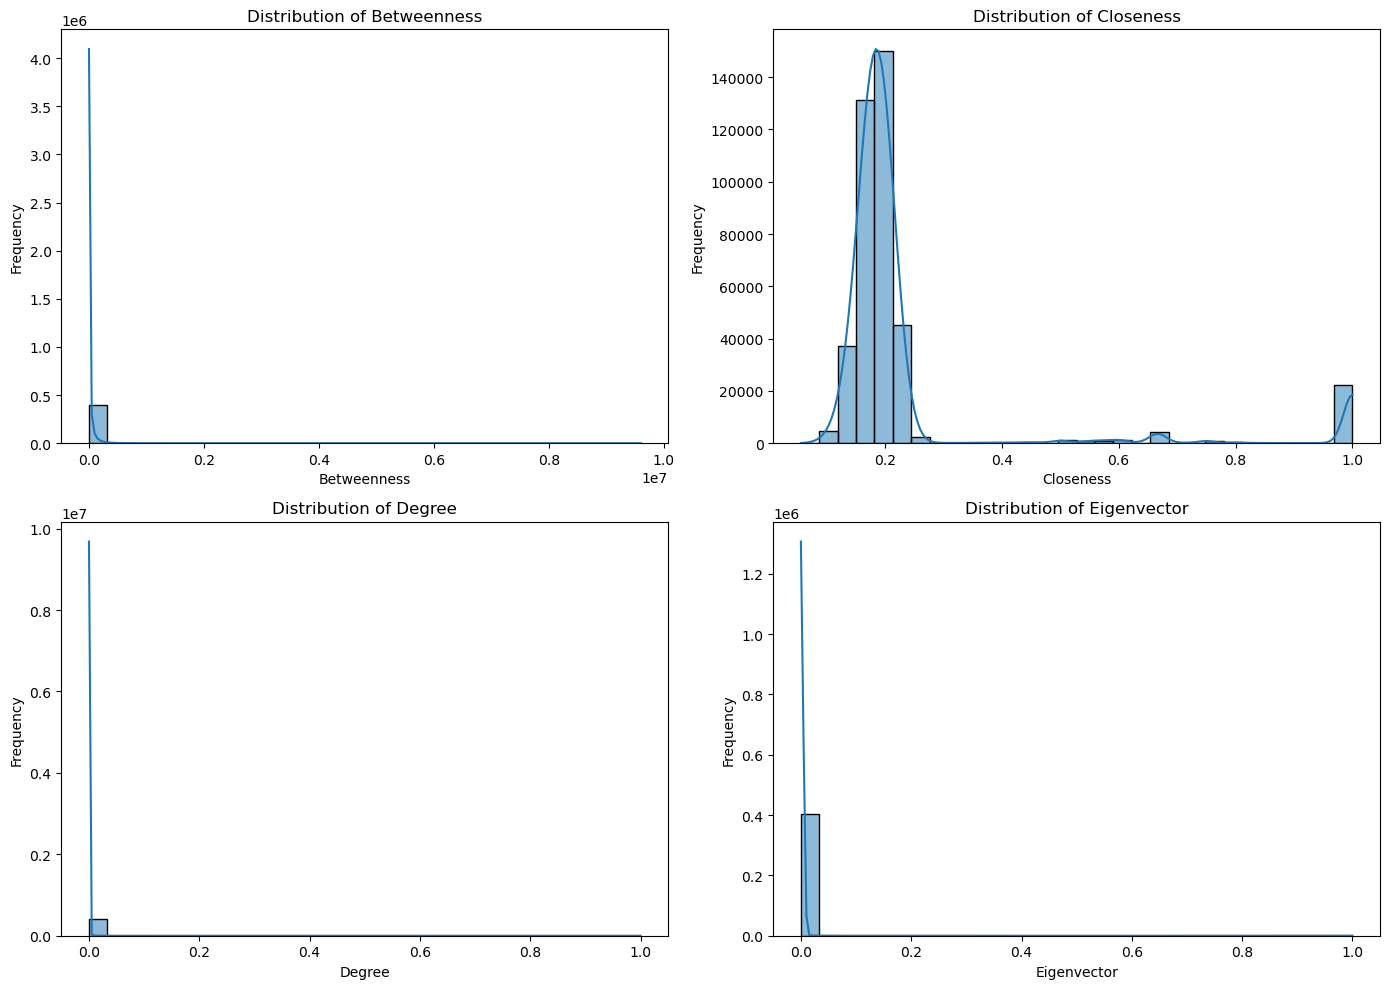

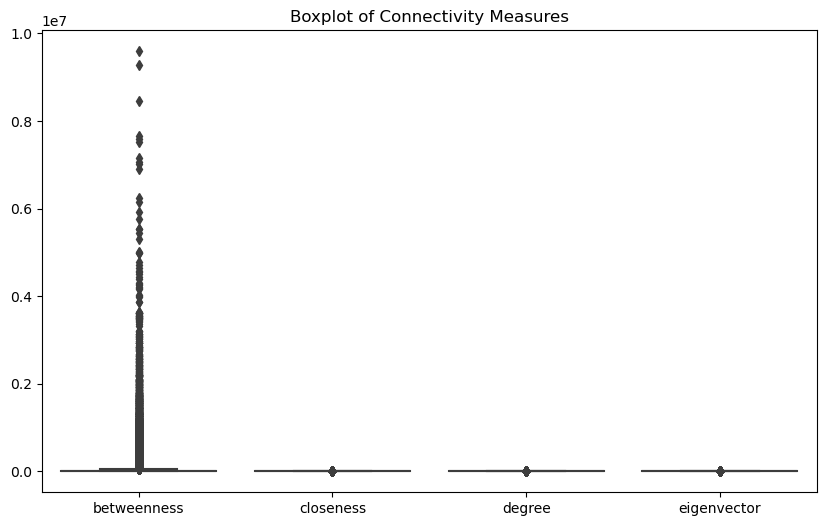

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

# Display summary statistics for the connectivity measures
print("Summary Statistics:")
print(connectivity[['betweenness', 'closeness', 'degree', 'eigenvector']].describe())

# Plot histograms with KDE for each connectivity measure
plt.figure(figsize=(14, 10))
centrality_measures = ['betweenness', 'closeness', 'degree', 'eigenvector']

for i, col in enumerate(centrality_measures, 1):
    plt.subplot(2, 2, i)
    sns.histplot(connectivity[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=connectivity[centrality_measures])
plt.title("Boxplot of Connectivity Measures")
plt.show()



In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the centrality columns
centrality_cols = ['betweenness', 'closeness', 'degree', 'eigenvector']

# Instantiate a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the columns, and create new normalized columns
connectivity[[col + '_norm' for col in centrality_cols]] = scaler.fit_transform(connectivity[centrality_cols])

# Display summary statistics of the normalized columns
print(connectivity[[col + '_norm' for col in centrality_cols]].describe())


       betweenness_norm  closeness_norm  degree_norm  eigenvector_norm
count        405,341.00      405,341.00   405,341.00        405,341.00
mean               0.00            0.20         0.00              0.00
std                0.01            0.21         0.00              0.05
min                0.00            0.00         0.00              0.00
25%                0.00            0.12         0.00              0.00
50%                0.00            0.14         0.00              0.00
75%                0.00            0.16         0.00              0.00
max                1.00            1.00         1.00              1.00


In [55]:
# Calculate connectivity score as 0.25 times each centrality measure
connectivity['connectivity_score'] = (
    0.25 * connectivity['betweenness_norm'] +
    0.25 * connectivity['closeness_norm'] +
    0.25 * connectivity['degree_norm'] +
    0.25 * connectivity['eigenvector_norm']
)

# Display the first few rows to verify the new column
print(connectivity.head())


   company_linking        year  betweenness  closeness  degree  eigenvector  \
0             6930  1960-01-01         0.00       1.00    1.00         1.00   
1            24708  1960-01-01         0.00       1.00    1.00         1.00   
2            80806  1960-01-01         0.00       1.00    1.00         1.00   
3             6930  1961-01-01         0.00       1.00    1.00         1.00   
4            24708  1961-01-01         0.00       1.00    1.00         1.00   

   betweenness_norm  closeness_norm  degree_norm  eigenvector_norm  \
0              0.00            1.00         1.00              1.00   
1              0.00            1.00         1.00              1.00   
2              0.00            1.00         1.00              1.00   
3              0.00            1.00         1.00              1.00   
4              0.00            1.00         1.00              1.00   

   connectivity_score  
0                0.75  
1                0.75  
2                0.75  
3       

count   405,341.00
mean          0.05
std           0.06
min           0.00
25%           0.03
50%           0.04
75%           0.04
max           0.75
Name: connectivity_score, dtype: float64


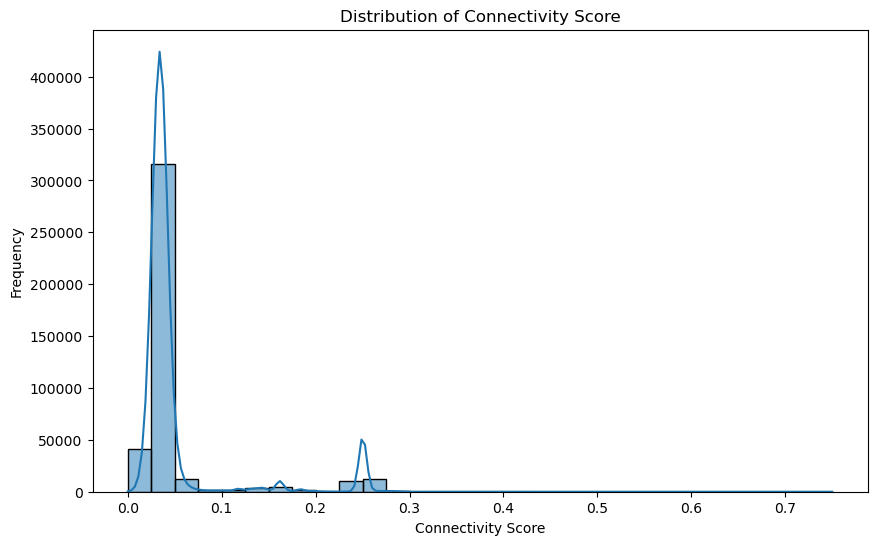

Connectivity Score Summary Statistics:
count   405,341.00
mean          0.05
std           0.06
min           0.00
25%           0.03
50%           0.04
75%           0.04
max           0.75
Name: connectivity_score, dtype: float64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show floats in plain decimal notation
pd.set_option('display.float_format', '{:,.2f}'.format)

# Now when you print DataFrames or Series, you'll see decimal numbers instead of scientific notation
print(connectivity['connectivity_score'].describe())

# Plot a histogram with a KDE curve for the connectivity score
plt.figure(figsize=(10, 6))
sns.histplot(connectivity['connectivity_score'].dropna(), kde=True, bins=30)
plt.title("Distribution of Connectivity Score")
plt.xlabel("Connectivity Score")
plt.ylabel("Frequency")
plt.show()

# Optionally, print summary statistics for the connectivity score
print("Connectivity Score Summary Statistics:")
print(connectivity['connectivity_score'].describe())


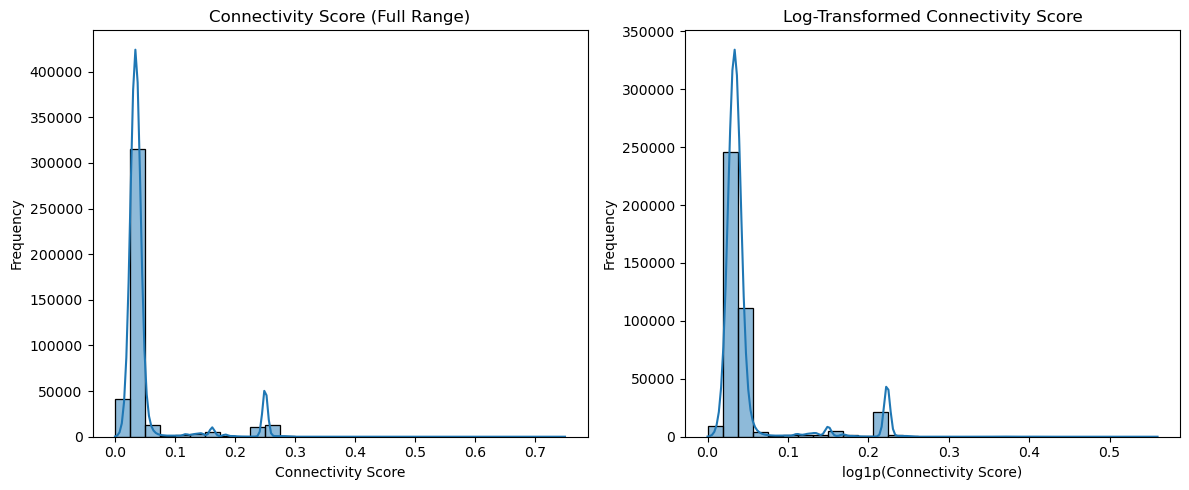

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame: connectivity_clean with column 'connectivity_score'

plt.figure(figsize=(12, 5))

# --- Subplot 1: Original Distribution ---
plt.subplot(1, 2, 1)
sns.histplot(connectivity['connectivity_score'], bins=30, kde=True)
plt.title("Connectivity Score (Full Range)")
plt.xlabel("Connectivity Score")
plt.ylabel("Frequency")

# --- Subplot 2: Log-Transformed Distribution ---
# log1p(x) = ln(x + 1) handles zero/near-zero values gracefully
score_log = np.log1p(connectivity['connectivity_score'])

plt.subplot(1, 2, 2)
sns.histplot(score_log, bins=30, kde=True)
plt.title("Log-Transformed Connectivity Score")
plt.xlabel("log1p(Connectivity Score)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [58]:
link.columns

Index(['PERMCO', 'GVKEY', 'companyid', 'score', 'preferred', 'duplicate'], dtype='object')

In [59]:


connectivity_linked = connectivity.merge(link, left_on='company_linking', right_on='companyid', how='inner')

print(connectivity_linked.head())


   company_linking        year  betweenness  closeness  degree  eigenvector  \
0             6930  1960-01-01         0.00       1.00    1.00         1.00   
1             6930  1961-01-01         0.00       1.00    1.00         1.00   
2             6930  1962-01-01         0.00       1.00    0.29         0.00   
3             6930  1963-01-01         0.00       1.00    0.29         0.00   
4             6930  1964-01-01         0.00       1.00    0.29         0.00   

   betweenness_norm  closeness_norm  degree_norm  eigenvector_norm  \
0              0.00            1.00         1.00              1.00   
1              0.00            1.00         1.00              1.00   
2              0.00            1.00         0.29              0.00   
3              0.00            1.00         0.29              0.00   
4              0.00            1.00         0.29              0.00   

   connectivity_score  PERMCO  GVKEY  companyid  score  preferred  duplicate  
0                0.75   2

In [60]:
total_rows = connectivity.shape[0]

#count how many rows have a non-null 'companyid' after merging
matched_rows = connectivity_linked['companyid'].notnull().sum()
merge_rate = matched_rows / total_rows * 100

print(f"Total rows in connectivity: {total_rows}")
print(f"Matched rows in linking table: {matched_rows}")
print(f"Merge Rate: {merge_rate:.2f}%")


Total rows in connectivity: 405341
Matched rows in linking table: 171718
Merge Rate: 42.36%


In [61]:
import pandas as pd

# Create a column 'match' that indicates if the merge was successful (non-null 'companyid' from the linking table)
connectivity_linked['match'] = connectivity_linked['companyid'].notnull()

# Group by the 'year' column from your connectivity DataFrame (assuming it's in merged_df)
merge_by_year = connectivity_linked.groupby('year')['match'].agg(total='count', matched='sum')

# Calculate the merge rate per year as a percentage
merge_by_year['merge_rate'] = (merge_by_year['matched'] / merge_by_year['total']) * 100

# Display the result
print(merge_by_year.head(50))


            total  matched  merge_rate
year                                  
1960-01-01      1        1      100.00
1961-01-01      1        1      100.00
1962-01-01      7        7      100.00
1963-01-01      7        7      100.00
1964-01-01      7        7      100.00
1965-01-01      8        8      100.00
1966-01-01      9        9      100.00
1967-01-01      9        9      100.00
1968-01-01     25       25      100.00
1969-01-01     34       34      100.00
1970-01-01     42       42      100.00
1971-01-01     54       54      100.00
1972-01-01     72       72      100.00
1973-01-01     87       87      100.00
1974-01-01    107      107      100.00
1975-01-01    117      117      100.00
1976-01-01    151      151      100.00
1977-01-01    179      179      100.00
1978-01-01    207      207      100.00
1979-01-01    257      257      100.00
1980-01-01    298      298      100.00
1981-01-01    360      360      100.00
1982-01-01    423      423      100.00
1983-01-01    509      50

In [72]:
crsp.columns
connectivity_linked['year'] = pd.to_datetime(connectivity_linked['year'], format='%Y-%m-%d').dt.year


In [74]:
import pandas as pd

# Ensure CRSP dates are in datetime format and extract the year
crsp['MthCalDt'] = pd.to_datetime(crsp['MthCalDt'])
crsp['year'] = crsp['MthCalDt'].dt.year

# Make sure the year in connectivity_linked is in the same format (e.g., integer)
connectivity_linked['year'] = connectivity_linked['year'].astype(int)

# Merge on the pair: ('permco_company', 'year') from connectivity_linked and ('PERMCO', 'year') from CRSP
merged_df = connectivity_linked.merge(
    crsp,
    left_on=['PERMCO', 'year'],
    right_on=['PERMCO', 'year'],
    how='inner'
)

# The merged DataFrame now repeats each connectivity record for each monthly observation in that year
print(merged_df.head())


   company_linking  year  betweenness  closeness  degree  eigenvector  \
0             6930  1986     3,368.42       0.16    0.00         0.00   
1             6930  1986     3,368.42       0.16    0.00         0.00   
2             6930  1986     3,368.42       0.16    0.00         0.00   
3             6930  1987     5,310.17       0.15    0.00         0.00   
4             6930  1987     5,310.17       0.15    0.00         0.00   

   betweenness_norm  closeness_norm  degree_norm  eigenvector_norm  ...  \
0              0.00            0.11         0.00              0.00  ...   
1              0.00            0.11         0.00              0.00  ...   
2              0.00            0.11         0.00              0.00  ...   
3              0.00            0.10         0.00              0.00  ...   
4              0.00            0.10         0.00              0.00  ...   

   match  PERMNO  HdrCUSIP  Ticker  SICCD   MthCalDt  MthPrc       MthCap  \
0   True   70519  17296742     CC

In [75]:
merged_df.shape

(1629944, 27)

1969      182
1970      209
1971      277
1972      369
1973      655
1974      795
1975      911
1976     1188
1977     1455
1978     1674
1979     2091
1980     2377
1981     2824
1982     3312
1983     3912
1984     4699
1985     5526
1986     6604
1987     8072
1988     9483
1989    10466
1990    11894
1991    13548
1992    16019
1993    19335
1994    22809
1995    25887
1996    30638
1997    34706
1998    38308
1999    41626
2000    45632
2001    48235
2002    49326
2003    50951
2004    54248
2005    57037
2006    57910
2007    57781
2008    55678
2009    51829
2010    50065
2011    48742
2012    48609
2013    49034
2014    50831
2015    51976
2016    50832
2017    49772
2018    49696
2019    49110
2020    49358
2021    57369
2022    61914
2023    58016
2024    54142
Name: year, dtype: int64


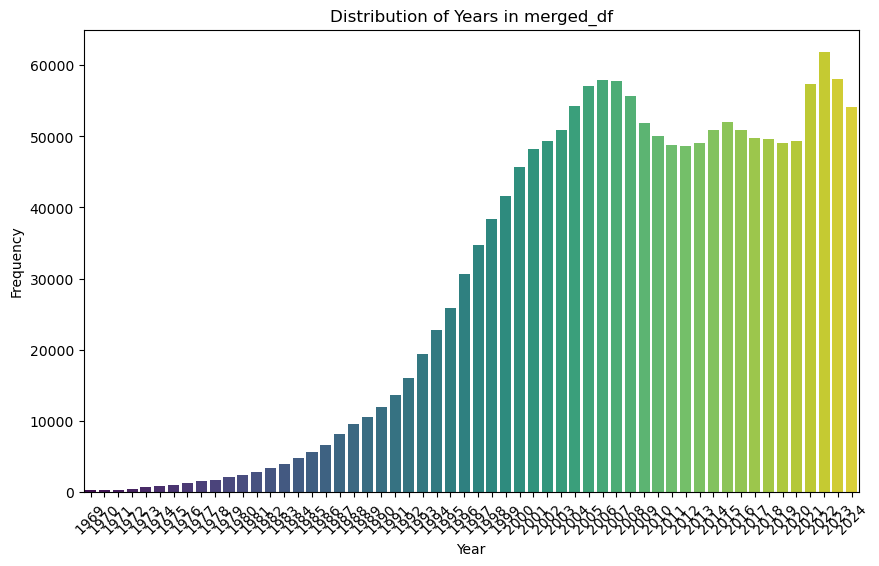

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts for each year
year_counts = merged_df['year'].value_counts().sort_index()
print(year_counts)

# Plot the distribution of years
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years in merged_df')
plt.xticks(rotation=45)
plt.show()


    year  connectivity_score  connectivity_quintile
0   1986                0.03                      2
1   1986                0.03                      2
2   1986                0.03                      2
3   1987                0.02                      2
4   1987                0.02                      2
5   1987                0.02                      2
6   1987                0.02                      2
7   1987                0.02                      2
8   1987                0.02                      2
9   1987                0.02                      2
10  1987                0.02                      2
11  1987                0.02                      2
12  1987                0.02                      2
13  1987                0.02                      2
14  1987                0.02                      2
15  1988                0.02                      2
16  1988                0.02                      2
17  1988                0.02                      2
18  1988    

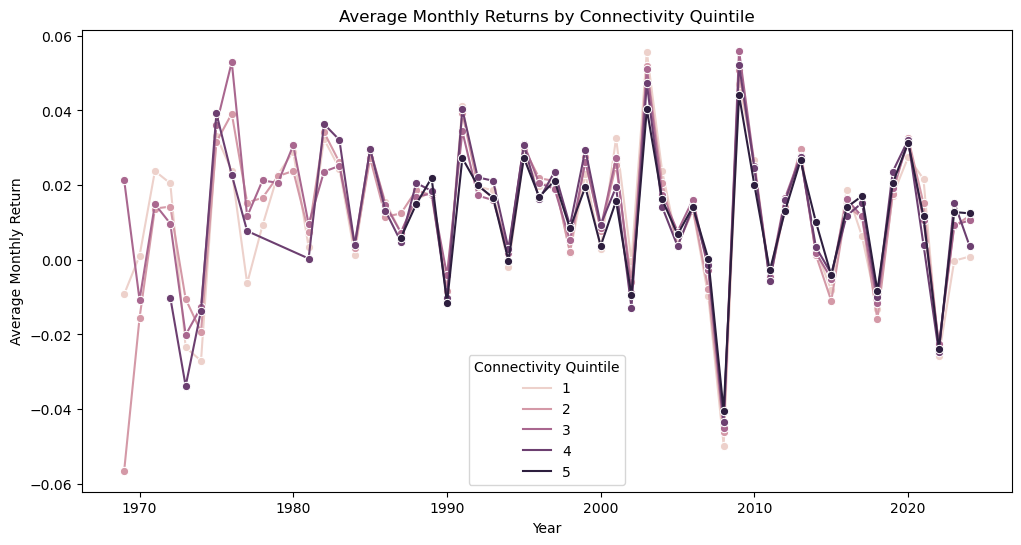

In [78]:
import pandas as pd

# Ensure connectivity_score is numeric
merged_df['connectivity_score'] = pd.to_numeric(merged_df['connectivity_score'], errors='coerce')

# Create quintile labels for connectivity scores within each year using pd.qcut.
# This assigns quintile values 1 (lowest) to 5 (highest).
merged_df['connectivity_quintile'] = merged_df.groupby('year')['connectivity_score'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

# Check a sample of the data with the new quintile column
print(merged_df[['year', 'connectivity_score', 'connectivity_quintile']].head(20))

# Now, since your merged_df has monthly returns (e.g., 'MthRet'), you can group by year and quintile
# to compute average monthly returns for each portfolio.
portfolio_returns = merged_df.groupby(['year', 'connectivity_quintile'])['MthRet'].mean().reset_index()

# Rename the column for clarity
portfolio_returns.rename(columns={'MthRet': 'avg_monthly_return'}, inplace=True)

# Display the portfolio returns by year and quintile
print(portfolio_returns)

# Optionally, you can visualize the average monthly returns for each quintile over the years:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_returns, x='year', y='avg_monthly_return', hue='connectivity_quintile', marker='o')
plt.title("Average Monthly Returns by Connectivity Quintile")
plt.xlabel("Year")
plt.ylabel("Average Monthly Return")
plt.legend(title='Connectivity Quintile')
plt.show()


Filtered data shape: (1620138, 28)
[1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 1982 1983 1984
 1985 1980 1981]
Average Monthly Returns by Connectivity Quintile (1980-2025):
   connectivity_quintile  MthRet
0                      1    0.01
1                      2    0.01
2                      3    0.01
3                      4    0.01
4                      5    0.01


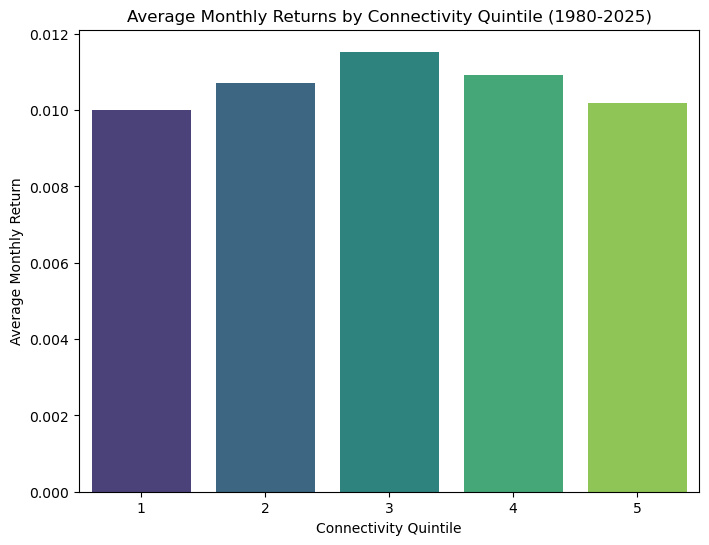

In [84]:
# Define dynamic start and end years
start_year = 1980  # Change this as needed
end_year = 2025 # Change this as needed

# Filter the merged_df using the dynamic years
merged_filtered = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] <= end_year)]

# Display the filtered data shape to verify
print("Filtered data shape:", merged_filtered.shape)
print(merged_filtered['year'].unique())

# Group by connectivity quintile and compute the average monthly return
avg_monthly_returns = merged_filtered.groupby('connectivity_quintile')['MthRet'].mean().reset_index()

print("Average Monthly Returns by Connectivity Quintile ({}-{}):".format(start_year, end_year))
print(avg_monthly_returns)

# Visualize the results with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='connectivity_quintile', y='MthRet', data=avg_monthly_returns, palette='viridis')
plt.xlabel('Connectivity Quintile')
plt.ylabel('Average Monthly Return')
plt.title(f'Average Monthly Returns by Connectivity Quintile ({start_year}-{end_year})')
plt.show()


In [85]:
# Number of unique firms in the connectivity DataFrame
unique_firms_connectivity = connectivity['company_linking'].nunique()
print("Unique firms in connectivity:", unique_firms_connectivity)

# Number of unique firms in the merged DataFrame (should be similar)
unique_firms_merged = merged_df['PERMCO'].nunique()
print("Unique firms in merged_df:", unique_firms_merged)

# Check monthly duplication: count the number of rows per firm-year in merged_df
firm_year_counts = merged_df.groupby(['company_linking', 'year']).size().reset_index(name='monthly_count')

# Display a sample of these counts
print("Sample firm-year counts (each firm-year should have ~12 rows if monthly):")
print(firm_year_counts.head())

# Optionally, show summary statistics of monthly_count to see the distribution
print("Monthly counts summary:")
print(firm_year_counts['monthly_count'].describe())


Unique firms in connectivity: 38380
Unique firms in merged_df: 10775
Sample firm-year counts (each firm-year should have ~12 rows if monthly):
   company_linking  year  monthly_count
0                3  1998             11
1                3  2003             12
2                3  2004             12
3                3  2005             12
4                3  2006             12
Monthly counts summary:
count   137,822.00
mean         11.83
std           3.45
min           1.00
25%          12.00
50%          12.00
75%          12.00
max         252.00
Name: monthly_count, dtype: float64
